This Week’s Fiddler

From Emilie Mitchell comes another March Madness mystery:

Once again, there are four teams remaining in a bracket: the 1-seed, the 2-seed, the 3-seed, and the 4-seed. In the first round, the 1-seed faces the 4-seed, while the 2-seed faces the 3-seed. The winners of these two matches then face each other in the regional final.

Also, each team possesses a “power index” equal to 5 minus that team’s seed. In other words:

    The 1-seed has a power index of 4.

    The 2-seed has a power index of 3.

    The 3-seed has a power index of 2.

    The 4-seed has a power index of 1.

In any given matchup, the team with the greater power index would emerge victorious. However, March Madness fans love to root for the underdog. As a result, the team with the lower power index gets an effective “boost” B, where B is some positive non-integer. For example, B could be 0.5, 133.7, or 2𝜋, but not 1 or 42.

As an illustration, consider the matchup between the 2- and 3-seeds. The favored 2-seed has a power index of 3, while the underdog 3-seed has a power index of 2+B. When B is greater than 1, the 3-seed will defeat the 2-seed in an upset.

Depending on the value of B, different teams will win the tournament. Of the four teams, how many can never win, regardless of the value of B?



This Week’s Extra Credit

From Emilie Mitchell also comes some extra credit:

Instead of four teams, now there are 2^6, or 64, seeded from 1 through 64. The power index of each team is equal to 65 minus that team’s seed.

The teams play in a traditional seeded tournament format. That is, in the first round, the sum of opponents’ seeds is 26+1, or 65. If the stronger team always advances, then the sum of opponents’ seeds in the second round is 25+1, or 33, and so on.

Once again, the underdog in every match gets a power index boost B, where B is some positive non-integer. Depending on the value of B, different teams will win the tournament. Of the 64 teams, how many can never win, regardless of the value of B?

--- Let's create functions to calculate the winner for a particular input lineup and B value.
It should suffice to check a finite set of B values 0.1, 1.1 .... 64.1

In [85]:
def lineup(depth, level=0, min_seed=1):
    """depth is how deep you want the tournament tree to be."""
    if (level == depth):
        # At the leaf of the tree, just return each team with probability 1.
        return [min_seed]
    next_level = level + 1
    min_seed_sum = (2**next_level)+1
    A = lineup(depth, next_level, min_seed)
    B = lineup(depth, next_level, (min_seed_sum-min_seed))
    return A + B

lineup(3)

[1, 8, 4, 5, 2, 7, 3, 6]

In [86]:
def one_match(u, v, power_index_base, B=0):
    p_u = power_index_base - u
    p_v = power_index_base - v
    if (p_u < p_v):
        p_u += B
    else:
        p_v += B
    match_winner = u if (p_u > p_v) else v
    return match_winner

one_match(2,7,9,9)

7

In [87]:
def one_tournament(in_teams, power_index_base, B=0):
    teams = in_teams
    while (len(teams) > 1):
        winners = []
        for i in range(0,len(teams),2):
            u,v = teams[i], teams[i+1]
            w = one_match(u,v,power_index_base,B)
            winners.append(w)
        teams = winners
    return winners[0]

one_tournament([1,4,2,3], 5, 0)


1

In [105]:
def find_num_possible_non_winners(depth, debug=0):
    all_teams = lineup(depth)
    if (debug > 1):
        print(all_teams)
    winners =[]
    power_index_base = (2**depth)+1
    for X in range(power_index_base-1):
        B = X + 0.1
        winner = one_tournament(all_teams, power_index_base, B)
        winners.append(winner)
        if (debug > 1):
            print(f"{B=}   {winner=}")
    winners = list(set(winners))
    non_winners = list(set(all_teams) - set(winners))
    if (debug > 0):
        print(non_winners)
    return len(non_winners)

find_num_possible_non_winners(3,2)

[1, 8, 4, 5, 2, 7, 3, 6]
B=0.1   winner=1
B=1.1   winner=1
B=2.1   winner=3
B=3.1   winner=2
B=4.1   winner=6
B=5.1   winner=7
B=6.1   winner=7
B=7.1   winner=8
[4, 5]


2

Now with all those functions in place, lets' solve the base fiddler.

In [97]:
find_num_possible_non_winners(2)

1

Looks correct.
And solve the extra credit.

In [98]:
find_num_possible_non_winners(6)

27

Let's see how the fraction of non-winners evolves with the depth of the tournament tree.

In [99]:
def find_fraction_of_non_winners(depth, debug=0):
    total = 2**depth
    non_winners = find_num_possible_non_winners(depth, debug)
    return (non_winners / total)

[0.0, 0.25, 0.25, 0.3125, 0.375, 0.421875, 0.453125, 0.47265625, 0.484375, 0.4912109375, 0.4951171875, 0.497314453125, 0.49853515625, 0.49920654296875, 0.49957275390625]


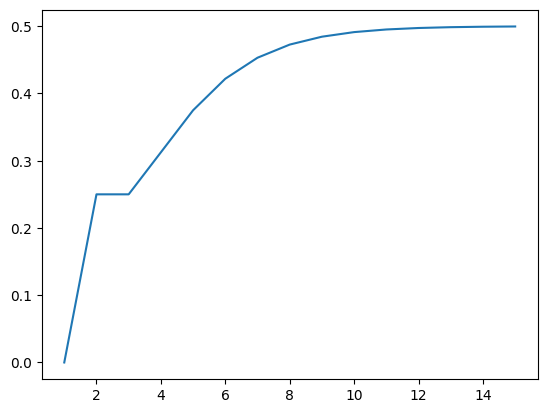

In [95]:
import matplotlib.pyplot as plt
N1=15
x_list = range(1,N1+1)
y_list = [find_fraction_of_non_winners(k) for k in x_list]
print ( y_list )
plt.plot(x_list, y_list)
plt.show()

Interesting little kink for small sizes.

And it clearly converges to 0.5
Wonder if there is a way to reason that out directly.

Actually, I see something. 
In the firt round, teams are paired up in a specific way.
If seed A is playing seed B, then A + B = 2^k + 1, which is odd.
Which means one of A and B is an odd seed, and the other is an even seed.
So, the differences in seedings = |A-B| are also odd.
Which means that while we have, say 64 teams, there are only 32 possible values for the differences in seedings.
So, at least for the first round, there are only  33 ranges of values of B that are interesting.

Not sure about propagating the reasoning to later rounds, but it's a good start.

And we can see a similar pattern when checking which seed wins with each value of B in the printout below.
Very frequently, the winner is the same for 2 successive values of B, and changes to another one for the next two, and so on.
Example (for 64 teams):
B=17.1   winner=23
B=18.1   winner=23
B=19.1   winner=22
B=20.1   winner=22
B=21.1   winner=21
B=22.1   winner=21

In [107]:
find_num_possible_non_winners(6,2)

[1, 64, 32, 33, 16, 49, 17, 48, 8, 57, 25, 40, 9, 56, 24, 41, 4, 61, 29, 36, 13, 52, 20, 45, 5, 60, 28, 37, 12, 53, 21, 44, 2, 63, 31, 34, 15, 50, 18, 47, 7, 58, 26, 39, 10, 55, 23, 42, 3, 62, 30, 35, 14, 51, 19, 46, 6, 59, 27, 38, 11, 54, 22, 43]
B=0.1   winner=1
B=1.1   winner=1
B=2.1   winner=3
B=3.1   winner=2
B=4.1   winner=6
B=5.1   winner=5
B=6.1   winner=5
B=7.1   winner=4
B=8.1   winner=12
B=9.1   winner=11
B=10.1   winner=11
B=11.1   winner=10
B=12.1   winner=10
B=13.1   winner=9
B=14.1   winner=9
B=15.1   winner=8
B=16.1   winner=24
B=17.1   winner=23
B=18.1   winner=23
B=19.1   winner=22
B=20.1   winner=22
B=21.1   winner=21
B=22.1   winner=21
B=23.1   winner=20
B=24.1   winner=20
B=25.1   winner=19
B=26.1   winner=19
B=27.1   winner=18
B=28.1   winner=18
B=29.1   winner=17
B=30.1   winner=17
B=31.1   winner=16
B=32.1   winner=48
B=33.1   winner=49
B=34.1   winner=49
B=35.1   winner=50
B=36.1   winner=50
B=37.1   winner=51
B=38.1   winner=51
B=39.1   winner=52
B=40.1   winn

27